In [100]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

x = iris.data.features
y = iris.data.targets


## 1) Проверить данные на нормальность
## 2) Проверить засоренные данные на нормальность

In [101]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [102]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [103]:
iris_data_set = x.join(y)

In [104]:
iris_data_set.head(20)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Задание 1
## Вид ириса: Iris-versicolor 
## Характеристика: Sepal width

In [105]:
iris_data = iris_data_set.loc[iris_data_set['class'] == 'Iris-versicolor']
iris_data = iris_data.iloc[:, 1]

In [106]:
iris_data.describe()

count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2.525000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal width, dtype: float64

In [107]:
print("Медиана: ", iris_data.median())
print("Среднее: ", iris_data.mean())
print("Мода: ", iris_data.mode().values[0])

Медиана:  2.8
Среднее:  2.7700000000000005
Мода:  3.0


In [108]:
asymmetry = stats.skew(iris_data.values)
print("Ассиметрия: ", asymmetry)
kurtosis = stats.kurtosis(iris_data.values)
print("Эксцесс: ", kurtosis)

Ассиметрия:  -0.3518674965401782
Эксцесс:  -0.44827189991677496


In [109]:
n = int(np.ceil(np.log2(50) + 1))

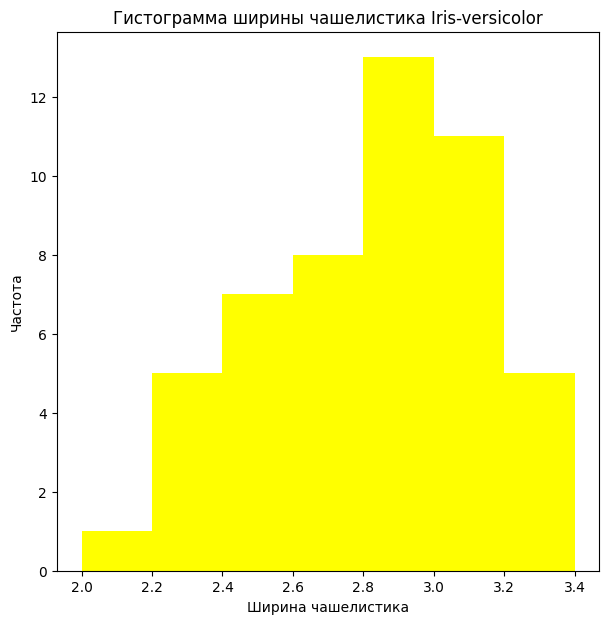

In [110]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.title('Гистограмма ширины чашелистика Iris-versicolor')
plt.xlabel('Ширина чашелистика')
plt.ylabel('Частота')
ax.hist(iris_data.values, bins=n, color="yellow")
plt.show()

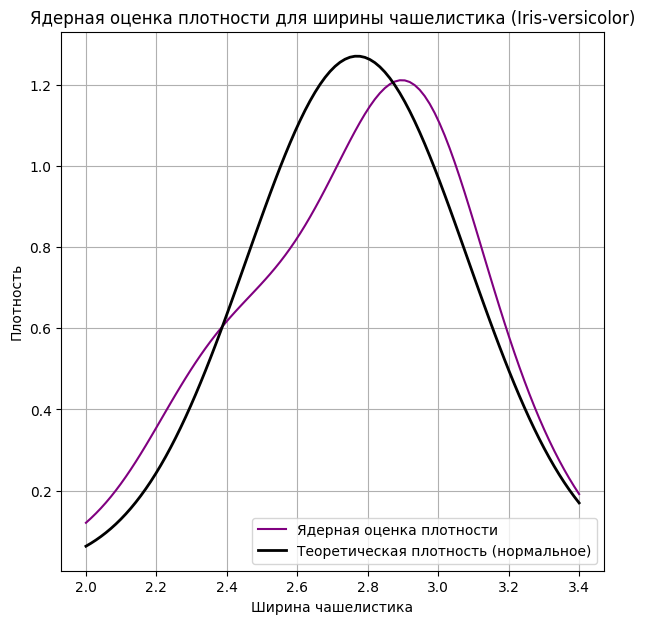

In [111]:
data = iris_data.values
kde = stats.gaussian_kde(data)
x_range = np.linspace(min(data), max(data), 100)
kde_values = kde(x_range)

plt.figure(figsize=(7, 7))
plt.plot(x_range, kde_values, label='Ядерная оценка плотности', color='purple')
plt.title('Ядерная оценка плотности для ширины чашелистика (Iris-versicolor)')
plt.xlabel('Ширина чашелистика')
plt.ylabel('Плотность')
mean = iris_data.mean()
std = iris_data.std()
xmin = min(data)
xmax = max(data)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Теоретическая плотность (нормальное)')

plt.legend()
plt.grid(True)
plt.legend()
plt.show()


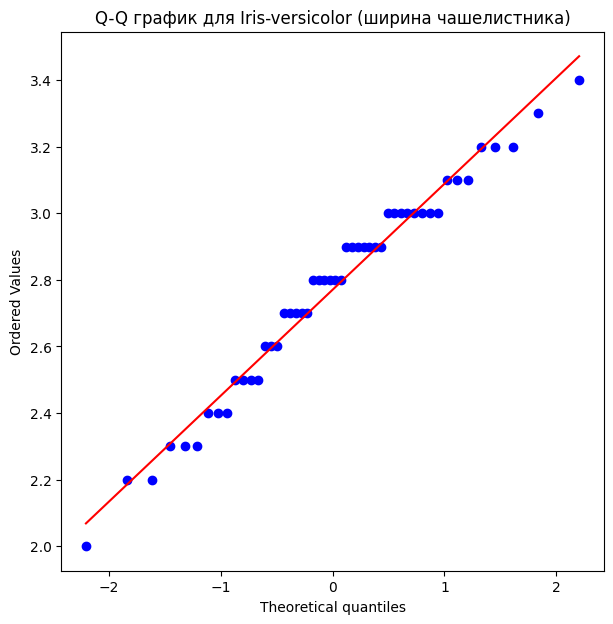

In [112]:
plt.figure(figsize=(7, 7))
stats.probplot(iris_data, dist="norm", plot=plt)
plt.title('Q-Q график для Iris-versicolor (ширина чашелистника)')
plt.show()

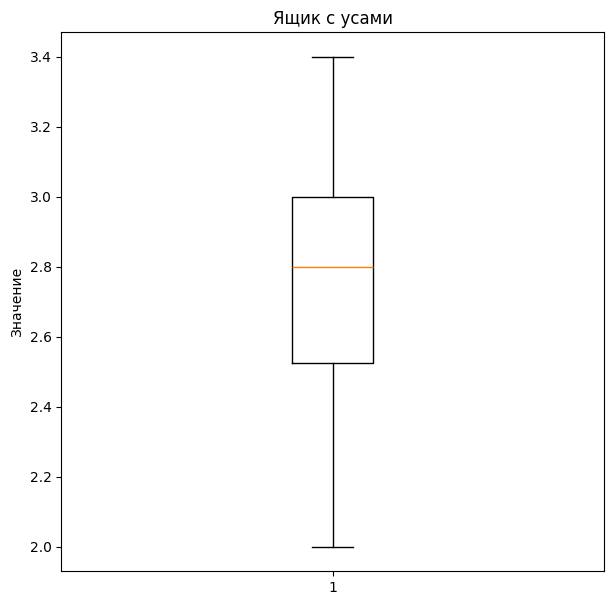

In [113]:
plt.figure(figsize=(7, 7))
plt.boxplot(iris_data.values)
plt.title('Ящик с усами')
plt.ylabel('Значение')
plt.show()

In [114]:
ks_statistic, ks_pvalue = stats.kstest(iris_data, 'norm', args=(iris_data.mean(), iris_data.std()))
print("Статистика теста Колмогорова-Смирнова: ", ks_statistic)
print("p-значение: ", ks_pvalue)

Статистика теста Колмогорова-Смирнова:  0.12066503937554096
p-значение:  0.4268879944935544


In [115]:
from scipy.stats import chisquare, norm

data = iris_data

mean = np.mean(data) 
std = np.std(data)   
n = 10  
observed_freq, bins = np.histogram(data, bins=n)

expected_freq = []
for i in range(len(bins) - 1):
    p = norm.cdf(bins[i + 1], loc=mean, scale=std) - norm.cdf(bins[i], loc=mean, scale=std)
    expected_freq.append(p * len(data))

expected_freq = np.array(expected_freq)
expected_freq = expected_freq * (np.sum(observed_freq) / np.sum(expected_freq))

chi2_statistic, chi2_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print("Статистика хи-квадрат:", chi2_statistic)
print("p-значение:", chi2_pvalue)

Статистика хи-квадрат: 10.149494978300241
p-значение: 0.3385189418106592


In [116]:
shapiro_stat, p_value = stats.shapiro(iris_data)
print(f"Статистика теста Шапиро-Уилка = {shapiro_stat}\np-значение = {p_value}")

Статистика теста Шапиро-Уилка = 0.9741332819702793
p-значение = 0.3379951061741208


# Задание 2
## Вид ириса: Iris-versicolor 
## Характеристика: Sepal length 

In [117]:
iris_data_2 = iris_data_set.loc[iris_data_set['class'] == 'Iris-versicolor']
iris_data_2 = iris_data_2.iloc[:, 0]
iris_data_3 = iris_data_2

In [118]:
mean = iris_data_2.mean()
new_values = [mean, mean, mean,  mean,  mean]
new_data = pd.Series(new_values, name='sepal length')

iris_data_2 = pd.concat([iris_data_2, new_data], axis=0)


iris_data_2 с засорениями,
iris_data_3 без засорений

In [119]:
iris_data_2.reset_index(drop=True, inplace=True)

In [120]:
iris_data_2

0     7.000
1     6.400
2     6.900
3     5.500
4     6.500
5     5.700
6     6.300
7     4.900
8     6.600
9     5.200
10    5.000
11    5.900
12    6.000
13    6.100
14    5.600
15    6.700
16    5.600
17    5.800
18    6.200
19    5.600
20    5.900
21    6.100
22    6.300
23    6.100
24    6.400
25    6.600
26    6.800
27    6.700
28    6.000
29    5.700
30    5.500
31    5.500
32    5.800
33    6.000
34    5.400
35    6.000
36    6.700
37    6.300
38    5.600
39    5.500
40    5.500
41    6.100
42    5.800
43    5.000
44    5.600
45    5.700
46    5.700
47    6.200
48    5.100
49    5.700
50    5.936
51    5.936
52    5.936
53    5.936
54    5.936
Name: sepal length, dtype: float64

In [121]:
print("Медиана с засорениями: ", iris_data_2.median())
print("Среднее с засорениями: ", iris_data_2.mean())
print("Мода с засорениями: ", iris_data_2.mode().values[0])

Медиана с засорениями:  5.936
Среднее с засорениями:  5.935999999999998
Мода с засорениями:  5.5


In [122]:
asymmetry = stats.skew(iris_data_3.values)
print("Ассиметрия без засорений: ", asymmetry)
kurtosis = stats.kurtosis(iris_data_3.values)
print("Эксцесс без засорений: ", kurtosis)
print()
asymmetry = stats.skew(iris_data_2.values)
print("Ассиметрия с засорениями: ", asymmetry)
kurtosis = stats.kurtosis(iris_data_2.values)
print("Эксцесс с засорениями: ", kurtosis)


Ассиметрия без засорений:  0.10218956951840928
Эксцесс без засорений:  -0.5988273407672806

Ассиметрия с засорениями:  0.10717732470161752
Эксцесс с засорениями:  -0.3587100748440073


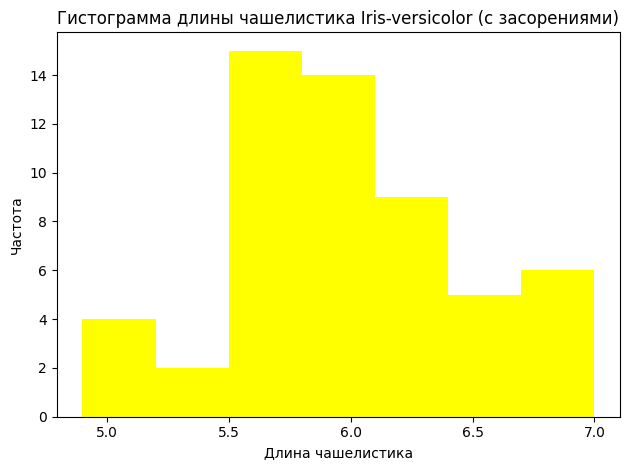

In [123]:
n1 = int(np.ceil(np.log2(55) + 1))

plt.title('Гистограмма длины чашелистика Iris-versicolor (с засорениями)')
plt.xlabel('Длина чашелистика')
plt.ylabel('Частота')
plt.hist(iris_data_2.values, bins=n1, color="yellow")

plt.tight_layout()
plt.show()

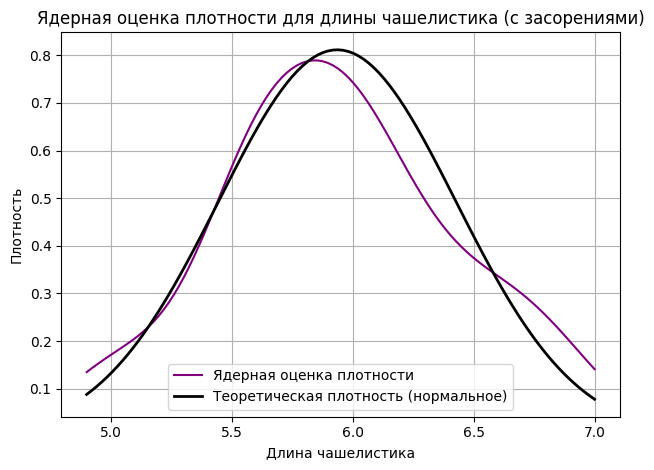

In [124]:
data1 = iris_data_3.values
kde1 = stats.gaussian_kde(data1)
x_range_1 = np.linspace(min(data1), max(data1), 100)
kde_values1 = kde1(x_range_1)

data2 = iris_data_2.values
kde2 = stats.gaussian_kde(data2)
x_range_2 = np.linspace(min(data2), max(data2), 100)
kde_values2 = kde2(x_range_2)


plt.plot(x_range_2, kde_values2, label='Ядерная оценка плотности', color='purple')
plt.title('Ядерная оценка плотности для длины чашелистика (с засорениями)')
plt.xlabel('Длина чашелистика')
plt.ylabel('Плотность')
mean2 = iris_data_2.mean()
std2 = iris_data_2.std()
xmin2 = min(data2)
xmax2 = max(data2)
x2 = np.linspace(xmin2, xmax2, 100)
p2 = stats.norm.pdf(x2, mean2, std2)
plt.plot(x2, p2, 'k', linewidth=2, label='Теоретическая плотность (нормальное)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


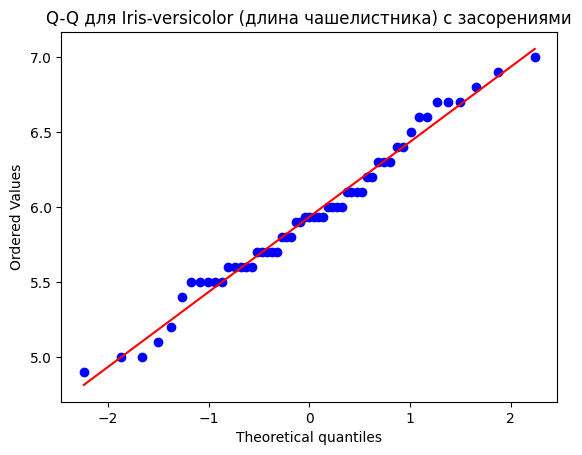

In [125]:
stats.probplot(iris_data_2, dist="norm", plot=plt)
plt.title('Q-Q для Iris-versicolor (длина чашелистника) с засорениями')
plt.show()

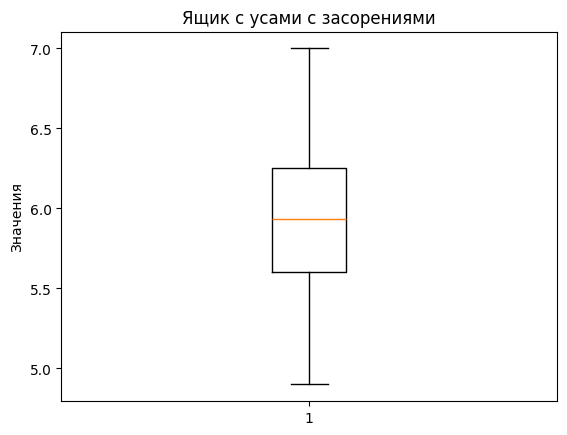

In [126]:
plt.boxplot(iris_data_2.values)
plt.title('Ящик с усами c засорениями')
plt.ylabel('Значения')
plt.show()

In [127]:
ks_statistic1, ks_pvalue1 = stats.kstest(iris_data_2, 'norm', args=(iris_data_2.mean(), iris_data_2.std()))
print("Статистика теста Колмогорова-Смирнова для данных с засорениями: ", ks_statistic1)
print("p-значение для данных с засорениями: ", ks_pvalue1)

Статистика теста Колмогорова-Смирнова для данных с засорениями:  0.0845826616806189
p-значение для данных с засорениями:  0.79499231932439


In [128]:
from scipy.stats import chisquare, norm

data = iris_data_2

mean = np.mean(data) 
std = np.std(data)    

n = 10  
observed_freq, bins = np.histogram(data, bins=n)

expected_freq = []
for i in range(len(bins) - 1):
    p = norm.cdf(bins[i + 1], loc=mean, scale=std) - norm.cdf(bins[i], loc=mean, scale=std)
    expected_freq.append(p * len(data))

expected_freq = np.array(expected_freq)
expected_freq = expected_freq * (np.sum(observed_freq) / np.sum(expected_freq))

chi2_statistic, chi2_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print("Статистика хи-квадрат:", chi2_statistic)
print("p-значение:", chi2_pvalue)


Статистика хи-квадрат: 10.870997513606945
p-значение: 0.28465519614194473


In [130]:
shapiro_stat1, p_value1 = stats.shapiro(iris_data_2)
print(
    f"Статистика теста Шапиро-Уилка для данных с засорениями: {shapiro_stat1}\np-значение для данных с засорениями: {p_value1}")

Статистика теста Шапиро-Уилка для данных с засорениями: 0.9804069074364177
p-значение для данных с засорениями: 0.5054869208564987
